# Частина 1

*В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.*


*На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.*



In [18]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from keras import losses
from keras import metrics


In [19]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [20]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [21]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7102 - loss: 0.8101 - val_accuracy: 0.8465 - val_loss: 0.4254
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8695 - loss: 0.3655 - val_accuracy: 0.8840 - val_loss: 0.3277
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8885 - loss: 0.3096 - val_accuracy: 0.8863 - val_loss: 0.3181
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8993 - loss: 0.2731 - val_accuracy: 0.8968 - val_loss: 0.2890
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9131 - loss: 0.2429 - val_accuracy: 0.8998 - val_loss: 0.2778
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9160 - loss: 0.2278 - val_accuracy: 0.9005 - val_loss: 0.2842
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9215 - loss: 0.2122 - val_accuracy: 0.9067 - val_loss: 0.2766
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9268 - loss: 0.1919 - val_accuracy: 0.

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\ntest accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8975 - loss: 0.4432

test accuracy: 0.8991000056266785


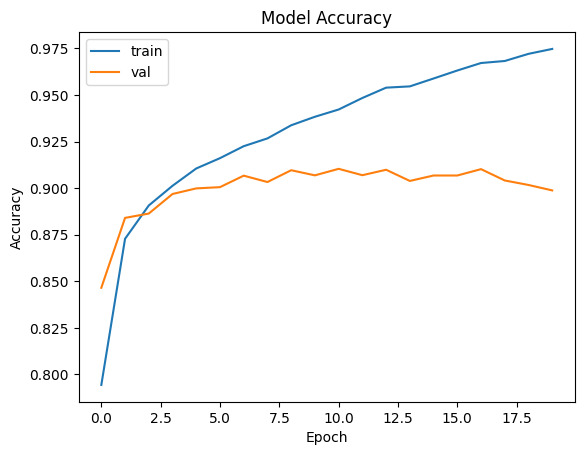

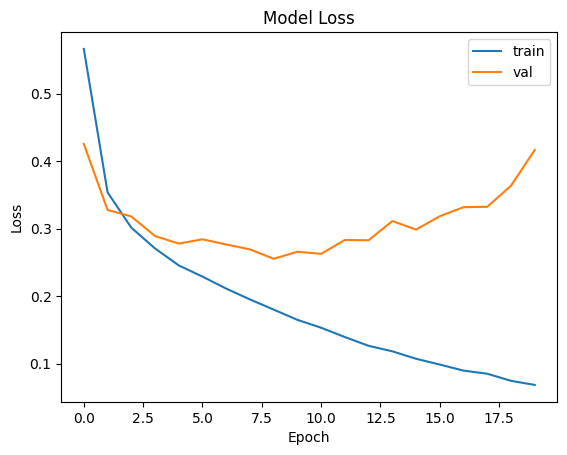

In [25]:
plt.plot(history.history['accuracy'], label='Accurancy on train data')
plt.plot(history.history['val_accuracy'], label='Accurancy on test data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

plt.plot(history.history['loss'], label='Loss on train data')
plt.plot(history.history['val_loss'], label='Loss on test data')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

In [26]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7220 - loss: 0.7523 - val_accuracy: 0.8629 - val_loss: 0.3748
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8750 - loss: 0.3481 - val_accuracy: 0.8836 - val_loss: 0.3145
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8938 - loss: 0.2936 - val_accuracy: 0.8900 - val_loss: 0.3057
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9035 - loss: 0.2624 - val_accuracy: 0.9018 - val_loss: 0.2749
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9141 - loss: 0.2329 - val_accuracy: 0.9018 - val_loss: 0.2695
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9234 - loss: 0.2094 - val_accuracy: 0.9068 - val_loss: 0.2457
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9282 - loss: 0.1935 - val_accuracy: 0.9078 - val_loss: 0.2532
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9345 - loss: 0.1749 - 

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\ntest accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9040 - loss: 0.4797

test accuracy: 0.9049999713897705


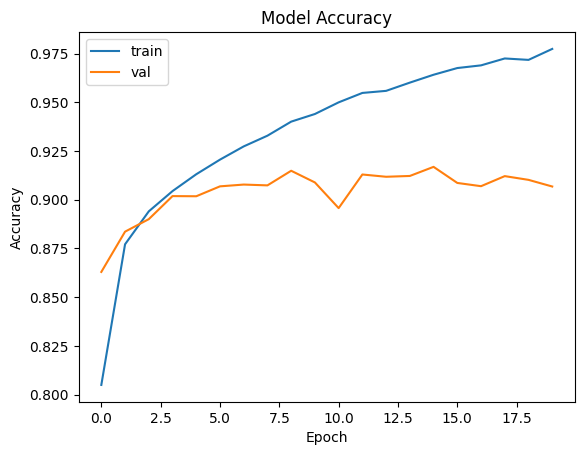

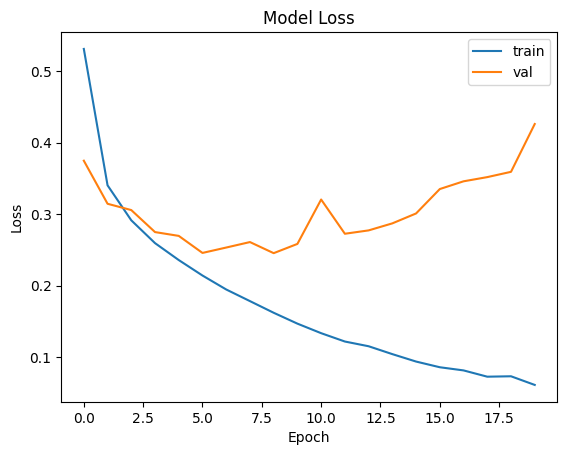

In [30]:
plt.plot(history.history['accuracy'], label='Accurancy on train data')
plt.plot(history.history['val_accuracy'], label='Accurancy on test data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

plt.plot(history.history['loss'], label='Loss on train data')
plt.plot(history.history['val_loss'], label='Loss on test data')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

Точність на навчальних даних зростає набагато швидше, ніж на тестових.
На тестових даних результати гірші, ніж на тренувальних. Та зростає помилка починаючи з дечятої епохи. Враховуючи це, можна зробити висновок, що спостерігається перенавчання.
Крім того, порівнюючи попередню домашню роботу, то точніть CNN краще на декілька відотків, а саме, 90% проти 88%.